# Introduction:

In [ ]:
#Govind_Vishwakarma
#Data_Scientist_and_Analyst
#Project_2_Bird_Strike_Data

# Import Dataset and Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Bird Strikes data.csv")

# EDA and Data Cleaning:

In [ ]:
df.shape

(25558, 26)

In [ ]:
df.head(2)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No


In [ ]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [ ]:
df.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [ ]:
#Handeling missing values:

df["Aircraft: Type"].fillna(df["Aircraft: Type"].mode()[0], inplace=True)
df["Airport: Name"].fillna(df["Airport: Name"].mode()[0],inplace=True)
df["Altitude bin"].fillna(df["Altitude bin"].mode()[0],inplace=True)
df["Wildlife: Number struck"].fillna(df["Wildlife: Number struck"].mode()[0],inplace=True)
df["Effect: Impact to flight"].fillna("Unknown", inplace=True)
df["FlightDate"].fillna(method="ffill", inplace=True) #Forward fill as it's date time columns
df["Aircraft: Number of engines?"].fillna(df["Aircraft: Number of engines?"].mode()[0],inplace=True)#As value 2 around 90-93%
df["Aircraft: Airline/Operator"].fillna(df["Aircraft: Airline/Operator"].mode()[0],inplace=True)
df["Origin State"].fillna("Unknown",inplace=True) #There is slight difference between all datapoints
df["When: Phase of flight"].fillna(method="ffill",inplace=True)
df["Conditions: Precipitation"].fillna("Unknown",inplace=True)
df["Remarks"].fillna("Unknown",inplace=True)
df["Wildlife: Size"].fillna(method="ffill",inplace=True)
df["Pilot warned of birds or wildlife?"].fillna(method="bfill",inplace=True)


# Important point info, that kept in mind during the operations:

### 1.Though the data(Wildlife: Number struck) is numerical but mostly the number of words struck is one and missing values are not that large, so better to replace with mode instead mean.

### 2.Similarly in "Effect: Impact to flight" column a huge amount of data is missing (around 23500 out of 25500), it is not suitable to replace with any method like mean, mode or median etc, so simply show "Unknown".

### 3.Since the missing data is quite substantial compared to the available data points, it might not be ideal to remove the entire "Conditions: Precipitation" column. Removing the column could result in a significant loss of information. Instead, you could consider marking the missing values as "unknown" or "missing" to indicate that the data is not available for those specific entries. This way, you can still include the column in your analysis while acknowledging the missing values.


In [ ]:
#Clean the data so proper for numerical operations
df["Feet above ground"]=df["Feet above ground"].str.replace(",","").astype("float")


<Axes: ylabel='Feet above ground'>

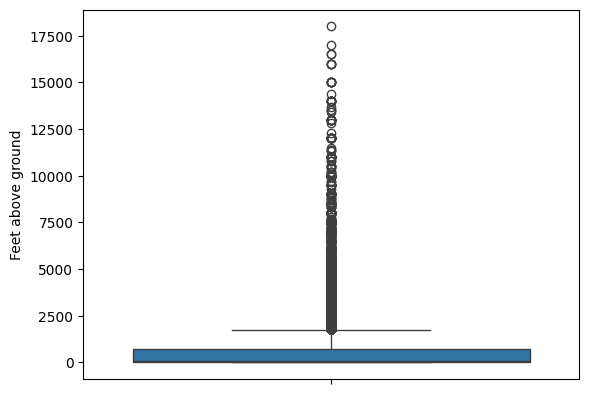

In [ ]:
#Check for outliers
import seaborn as sns
sns.boxplot(df["Feet above ground"])

In [ ]:
outliers=[]
def detect_outliers(data):
  threshold=3 #Third Std Deviation
  mean=np.mean(data)
  std=np.std(data)
  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers
len(detect_outliers(df["Feet above ground"]))

618

In [ ]:
#Since Outliers are in the dataset so best approach to fill null values would be median instead of mean:
df["Feet above ground"].fillna(df["Feet above ground"].median(),inplace=True)

In [ ]:
df["Is Aircraft Large?"].value_counts()

Is Aircraft Large?
No     17027
Yes     8402
Name: count, dtype: int64

In [ ]:
#As there are two kind of values with slightly 1:2 ratio, hence we can use forward or backward fill approach for missing values
df["Is Aircraft Large?"].fillna(method="ffill",inplace=True)

In [ ]:
#No null values now:
df.isnull().sum()

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Remarks                                    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Tota

In [ ]:
#Check for duplicate values, Also no duplicate rows
df.duplicated().value_counts()

False    25558
Name: count, dtype: int64

# Case Studies

- Visuals Depicting the Number of Bird Strikes
- Yearly Analysis & Bird Strikes in the US
- Top 10 US Airlines in terms of having encountered bird strikes
- Airports with most incidents of bird strikes – Top 50
- Yearly Cost Incurred due to Bird Strikes:
- When do most bird strikes occur?
- Altitude of aeroplanes at the time of strike
- Phase of flight at the time of the strike.
- Average Altitude of the aeroplanes in different phases at the time of strike
- Effect of Bird Strikes & Impact on Flight
- Effect of Strike at Different Altitude
- Were Pilots Informed? & Prior Warning and Effect of Strike Relation

#1.Visuals Depicting the Number of Bird Strikes

In [ ]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [ ]:
df['FlightDate'] = pd.to_datetime(df['FlightDate']) #Convert the 'FlightDate' column to datetime type
df['FlightDate']

<ipython-input-66-81549c86e757>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FlightDate'] = pd.to_datetime(df['FlightDate']) #Convert the 'FlightDate' column to datetime type


0       2000-11-23
1       2001-07-25
2       2001-09-14
3       2002-09-05
4       2003-06-23
           ...    
25553   2011-12-30
25554   2011-12-30
25555   2011-12-30
25556   2011-12-31
25557   2011-12-31
Name: FlightDate, Length: 25558, dtype: datetime64[ns]

In [ ]:
df['Year'] = df['FlightDate'].dt.year #Extract the year from the 'FlightDate' column
df['Year']

0        2000
1        2001
2        2001
3        2002
4        2003
         ... 
25553    2011
25554    2011
25555    2011
25556    2011
25557    2011
Name: Year, Length: 25558, dtype: int32

In [ ]:
df[["FlightDate","Year","Wildlife: Number Struck Actual"]]

,FlightDate,Year,Wildlife: Number Struck Actual
0,2000-11-23,2000,859
1,2001-07-25,2001,424
2,2001-09-14,2001,261
3,2002-09-05,2002,806
4,2003-06-23,2003,942
...,...,...,...
25553,2011-12-30,2011,1
25554,2011-12-30,2011,1
25555,2011-12-30,2011,1
25556,2011-12-31,2011,1


In [ ]:
yearly_strikes = df.groupby('Year')['Wildlife: Number Struck Actual'].sum() #Group the data by year and sum the number of bird strikes
yearly_strikes

Year
2000    4564
2001    4727
2002    5512
2003    6195
2004    4353
2005    5141
2006    5842
2007    5076
2008    5361
2009    7184
2010    7685
2011    7150
Name: Wildlife: Number Struck Actual, dtype: int64

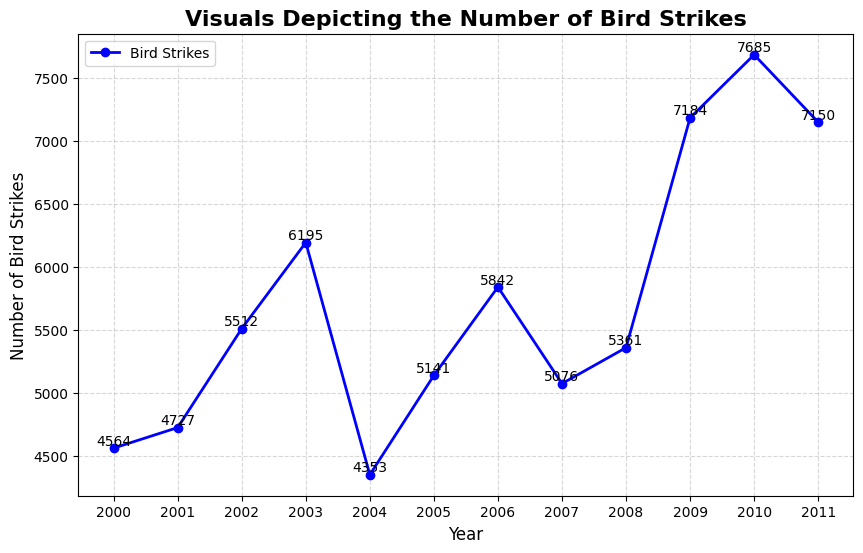

In [ ]:
#Visualise with the help of Line Chart
plt.figure(figsize=(10, 6)) #Plot a line chart
plt.plot(yearly_strikes.index, yearly_strikes.values, marker='o', linestyle='-', color='blue', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Bird Strikes', fontsize=12)
plt.title('Visuals Depicting the Number of Bird Strikes', fontsize=16, fontweight='bold')
plt.xticks(yearly_strikes.index)

#Show the data year-wise on the graph
for x, y in zip(yearly_strikes.index, yearly_strikes.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)

plt.legend(['Bird Strikes'], loc='upper left')
plt.gca().set_facecolor('white')

plt.show()

# 2.Yearly Analysis & Bird Strikes in the US

In [ ]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year'],
      dtype='object')

In [ ]:
df['FlightDate'] = pd.to_datetime(df['FlightDate']) #Convert the 'FlightDate' column to datetime type
df['FlightDate']

0       2000-11-23
1       2001-07-25
2       2001-09-14
3       2002-09-05
4       2003-06-23
           ...    
25553   2011-12-30
25554   2011-12-30
25555   2011-12-30
25556   2011-12-31
25557   2011-12-31
Name: FlightDate, Length: 25558, dtype: datetime64[ns]

In [ ]:
df["Year"]=df["FlightDate"].dt.year
df["Year"]

0        2000
1        2001
2        2001
3        2002
4        2003
         ... 
25553    2011
25554    2011
25555    2011
25556    2011
25557    2011
Name: Year, Length: 25558, dtype: int32

In [ ]:
df_citywise=df[["Origin State","Wildlife: Number Struck Actual","Year"]]
grouped_data=df_citywise.groupby("Origin State")

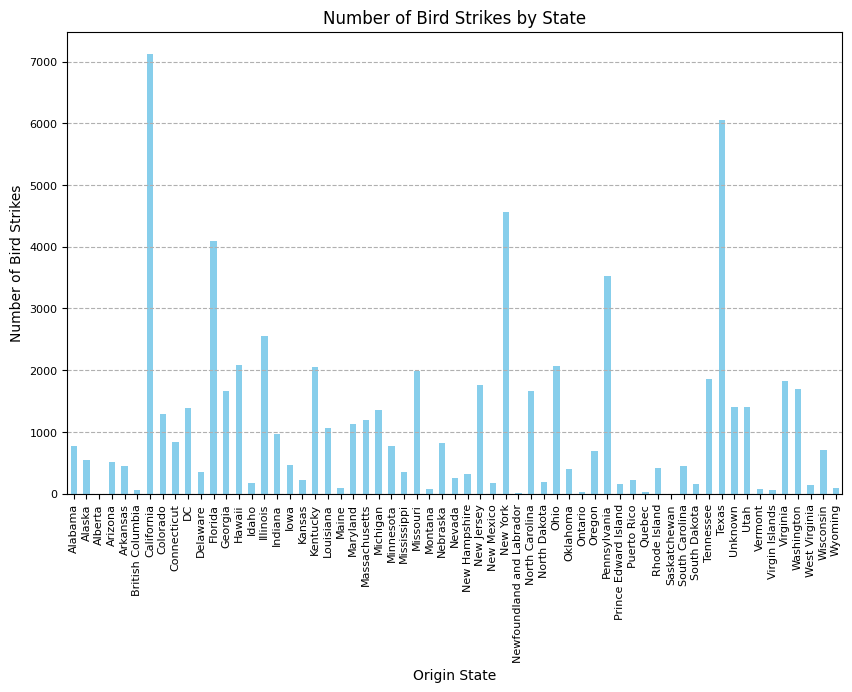

In [ ]:
import matplotlib.pyplot as plt

#Calculating the total number of bird strikes for each state
strike_counts = grouped_data["Wildlife: Number Struck Actual"].sum()

#Plotting the bar chart
strike_counts.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Number of Bird Strikes by State")
plt.xlabel("Origin State")
plt.ylabel("Number of Bird Strikes")
plt.grid(axis='y', linestyle='--')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

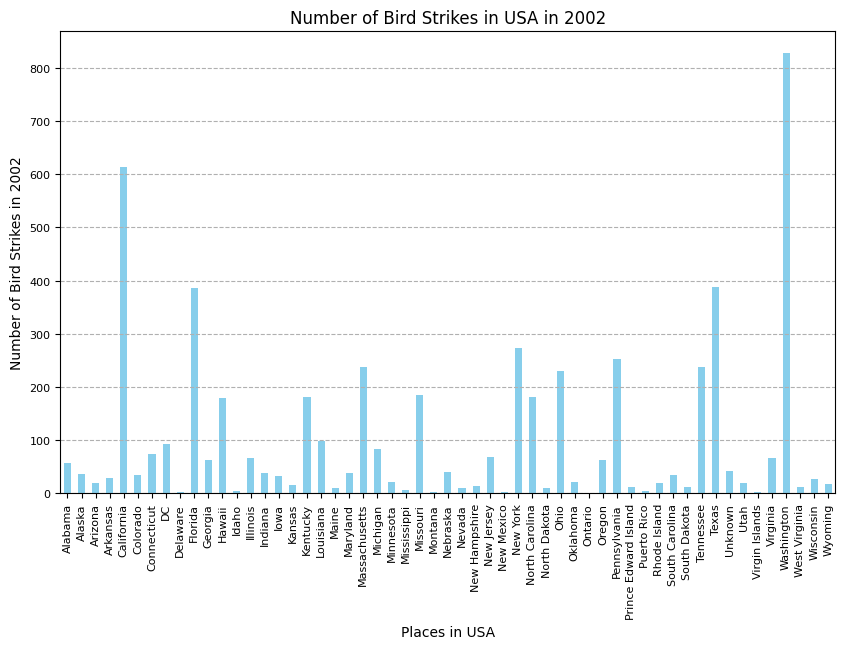

In [ ]:
##Filter the data for a particular year
year = 2002 #Say
filtered_data = df_citywise[df_citywise["Year"] == year]

grouped_data = filtered_data.groupby("Origin State")
strike_counts = grouped_data["Wildlife: Number Struck Actual"].sum() #Calculate the total number of bird strikes for each state
strike_counts.plot(kind="bar", figsize=(10, 6),color="skyblue")
plt.xlabel("Places in USA")
plt.ylabel(f"Number of Bird Strikes in {year}")
plt.title(f"Number of Bird Strikes in USA in {year}")
plt.grid(axis='y', linestyle='--')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

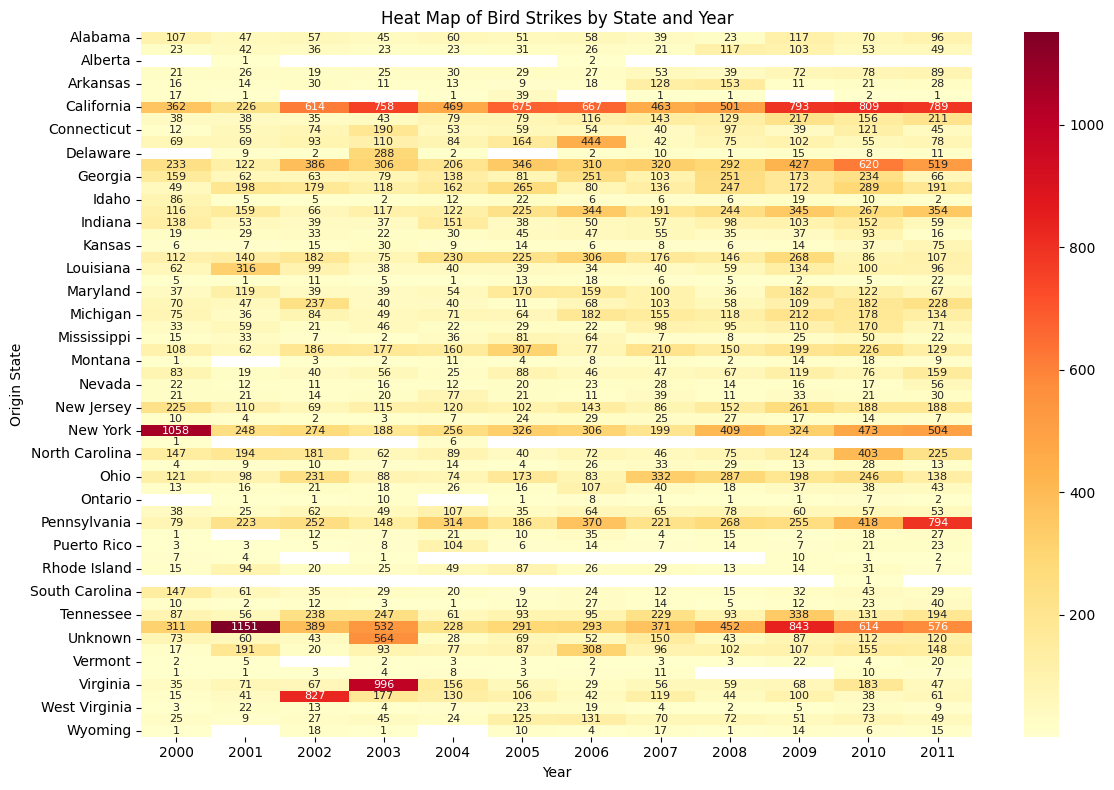

In [ ]:
#Yearly analysis for Birdstrike in US:
#Create a pivot table to reshape your data
pivot_table = df_citywise.pivot_table(values='Wildlife: Number Struck Actual', index='Origin State', columns='Year', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.0f', annot_kws={'fontsize': 8})  #Adjust the font size of annotations
plt.xlabel('Year')
plt.ylabel('Origin State')
plt.title('Heat Map of Bird Strikes by State and Year')
plt.tight_layout()  #Adjust the layout to prevent overlapping
plt.show()

# 3.Top 10 US Airlines in terms of having encountered bird strikes

In [ ]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year'],
      dtype='object')

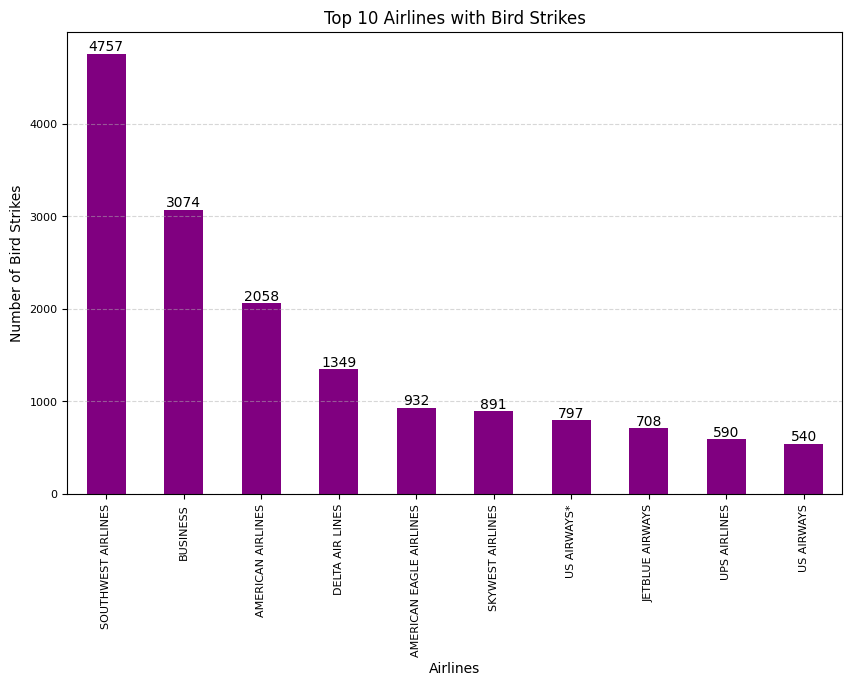

In [ ]:
# Grouping the data by airline and counting the number of bird strikes
bird_strikes = df.groupby('Aircraft: Airline/Operator')['Record ID'].count()

# Sorting the airlines based on the number of bird strikes in descending order
top_airlines = bird_strikes.sort_values(ascending=False)

# Getting the top 10 airlines
top_10_airlines = top_airlines.head(10)

top_10_airlines.plot(kind="bar", figsize=(10, 6), color="purple")

for i, count in enumerate(top_10_airlines.values):
  plt.text(i,count,str(count),ha="center",va="bottom")

plt.title("Top 10 Airlines with Bird Strikes")
plt.xlabel("Airlines")
plt.ylabel("Number of Bird Strikes")
plt.grid(True,axis="y", linestyle='--',alpha=0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# 4. Airports with most incidents of bird strikes – Top 50

In [ ]:
#Group the data by airport name and count the number of bird strikes
airport_counts = df.groupby('Airport: Name')['Wildlife: Number Struck Actual'].sum()
#Sort the airports by the number of bird strikes
top_50_airports = airport_counts.nlargest(50)
top_50_airports


Airport: Name
DALLAS/FORT WORTH INTL ARPT               3074
SACRAMENTO INTL                           1856
LAGUARDIA NY                              1579
PHILADELPHIA INTL                         1396
SALT LAKE CITY INTL                       1376
SAN FRANCISCO INTL ARPT                   1210
JOHN F KENNEDY INTL                       1207
SEATTLE-TACOMA INTL                       1181
NORFOLK INTL                              1119
BALTIMORE WASH INTL                       1027
NASHVILLE INTL                            1003
LOGAN INTL                                 962
KANSAS CITY INTL                           921
CHARLOTTE/DOUGLAS INTL ARPT                917
CINCINNATI/NORTHERN KENTUCKY INTL ARPT     915
LOUISVILLE INTL ARPT                       914
ATLANTA INTL                               897
NEWARK LIBERTY INTL ARPT                   880
ORLANDO INTL                               855
DENVER INTL AIRPORT                        845
WASHINGTON DULLES INTL ARPT                826

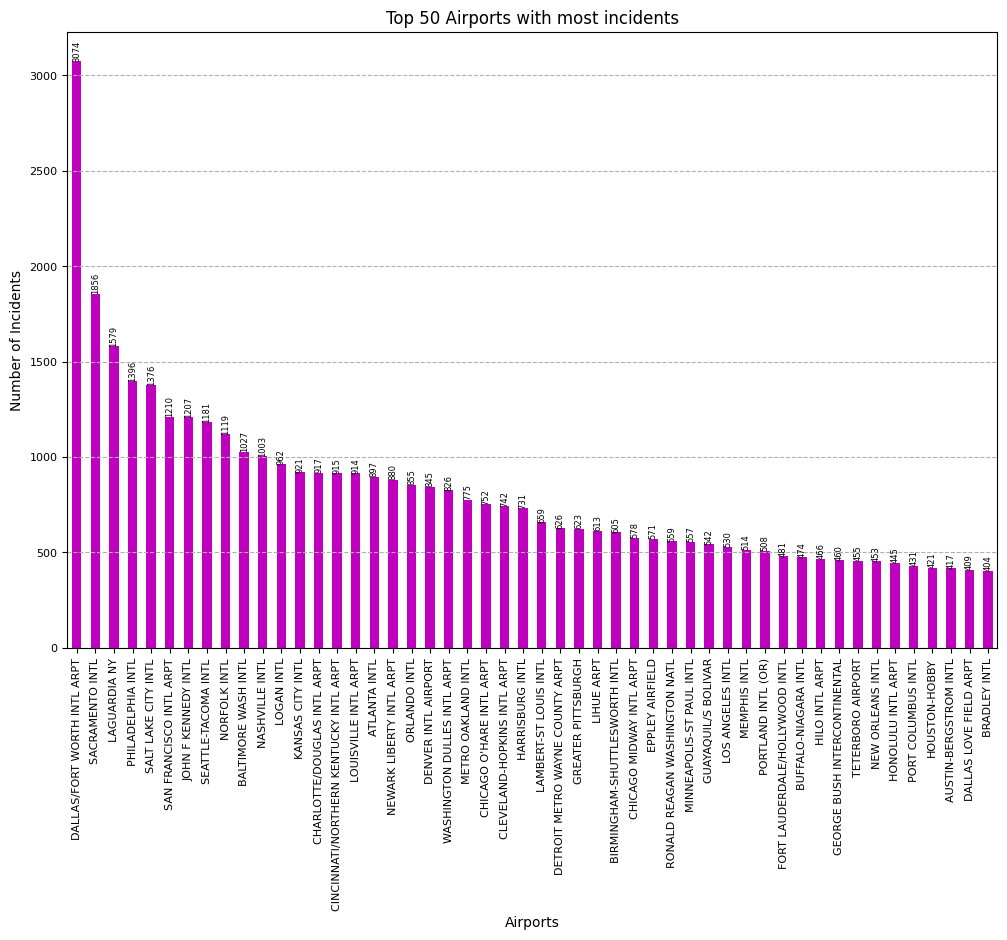

In [ ]:
top_50_airports.plot(kind="bar", figsize=(12, 8), color="m")

for i, count in enumerate(top_50_airports.values):
  plt.text(i,count,str(count),ha="center",va="bottom",rotation=90,fontsize=6)


# Display the plot

plt.title("Top 50 Airports with most incidents")
plt.xlabel("Airports")
plt.ylabel("Number of Incidents")
plt.grid(axis="y", linestyle='--')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# 5.Yearly Cost Incurred due to Bird Strikes:


In [ ]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year'],
      dtype='object')

In [ ]:
df["FlightDate"]=pd.to_datetime(df["FlightDate"])
df["Year"]=df["FlightDate"].dt.year
df["Year"]

0        2000
1        2001
2        2001
3        2002
4        2003
         ... 
25553    2011
25554    2011
25555    2011
25556    2011
25557    2011
Name: Year, Length: 25558, dtype: int32

In [ ]:
df["Cost: Total $"]=df["Cost: Total $"].str.replace(",","").astype("int")
df["Cost: Total $"]

0        30736
1            0
2            0
3            0
4            0
         ...  
25553        0
25554        0
25555        0
25556        0
25557        0
Name: Cost: Total $, Length: 25558, dtype: int64

In [ ]:
yearly_cost=df[['Year','Cost: Total $']].groupby("Year").sum()
yearly_cost

,Cost: Total $
Year,
2000,5625496
2001,23259457
2002,9046405
2003,13176787
2004,8136108
2005,7026904
2006,18309903
2007,10826204
2008,12011035


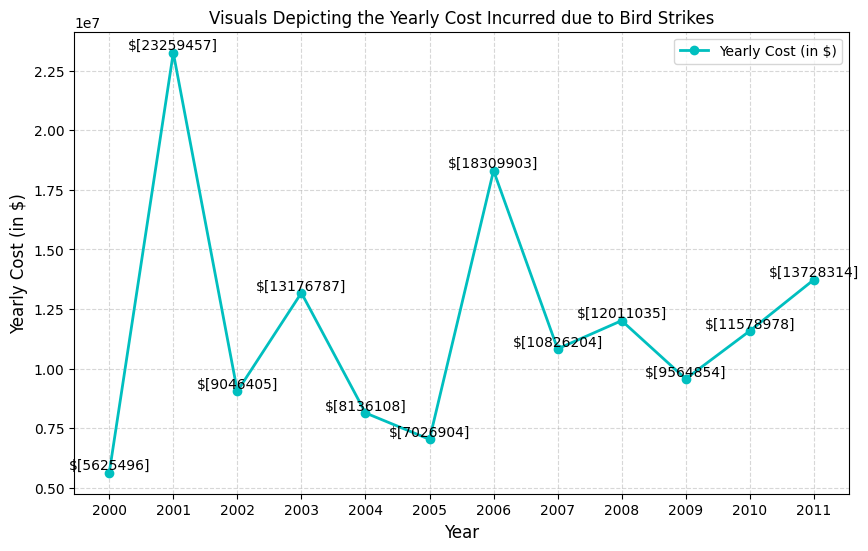

In [ ]:
#Visualise the Yearly Cost Incurred
plt.figure(figsize=(10,6))
plt.plot(yearly_cost.index,yearly_cost.values,marker="o",linestyle="-",color="c",linewidth=2)
plt.grid(True,linestyle="--",alpha=0.5)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Yearly Cost (in $)",fontsize=12)
plt.title("Visuals Depicting the Yearly Cost Incurred due to Bird Strikes")
plt.xticks(yearly_cost.index)

for x, y in zip(yearly_cost.index, yearly_cost.values):
    plt.text(x, y, f"${y}", ha="center", va="bottom")

#Let's Show the Amount too over the Dots
plt.legend(["Yearly Cost (in $)"],loc="upper right")
plt.show()

# 6.When do most bird strikes occur?

In [ ]:
#To Find out Most bird strikes Occurence:
'''We have different criteria to study over which are:
1.Altitude of airplanes at the time of strike
2.Phase of flight at the time of strike
3.Average Altitude of the airplanes in different'''

'We have different criteria to study over which are:\n1.Altitude of airplanes at the time of strike\n2.Phase of flight at the time of strike\n3.Average Altitude of the airplanes in different'

### 1.Altitude of airplanes at the time of strike

Text(0.5, 0, 'Altitude of Aeroplane')

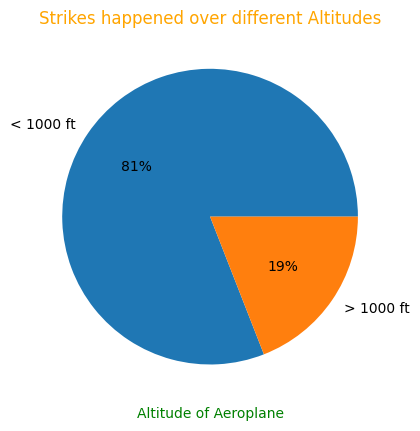

In [ ]:
Altitude_of_Aeroplane=df['Altitude bin'].value_counts()
Altitude_of_Aeroplane.plot(kind="pie",autopct="%1.0f%%")
plt.title("Strikes happened over different Altitudes",color="orange")
plt.ylabel("")
plt.xlabel("Altitude of Aeroplane",color="g")

### 2.Phase of flight at the time of the strike.


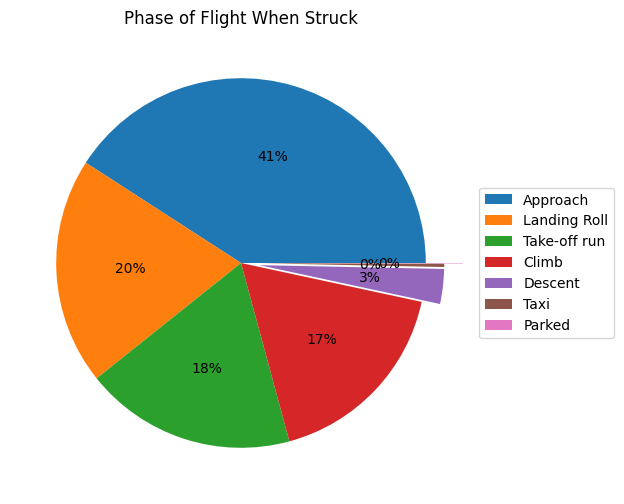

In [ ]:
Phase_of_Flight=df["When: Phase of flight"].value_counts()
plt.figure(figsize=(6,6))
#Defining the explode values for each slice
explode = (0, 0, 0, 0, 0.1, 0.1, 0.2)  #Separation for each slice (adjust as needed)

# Plotting the pie chart with explode and percentage values
plt.pie(Phase_of_Flight, explode=explode, autopct="%1.0f%%")
plt.legend(Phase_of_Flight.index, loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Phase of Flight When Struck")
plt.show()

### 3.Average Altitude of the airplanes in different phases at the time of strike

In [ ]:
Avg_Altitude_in_different_phases=df[["When: Phase of flight", "Feet above ground"]].groupby("When: Phase of flight").mean().round(2)
Avg_Altitude_in_different_phases

,Feet above ground
When: Phase of flight,
Approach,995.99
Climb,1194.49
Descent,5918.83
Landing Roll,0.30
Parked,0.00
Take-off run,0.25
Taxi,0.00


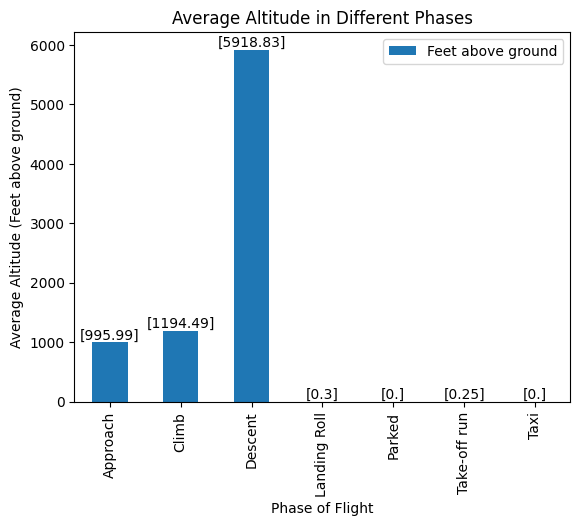

In [ ]:
#Plotting the bar chart for average altitude in different phases
Avg_Altitude_in_different_phases.plot(kind="bar")

plt.xlabel("Phase of Flight")
plt.ylabel("Average Altitude (Feet above ground)")
plt.title("Average Altitude in Different Phases")

for x, y in enumerate(Avg_Altitude_in_different_phases.values):
    plt.text(x, y, str(y), ha="center", va="bottom")

plt.show()

# 7.Effect of Bird Strikes:

1.Impact on Flight    
2.Effect of Strike at Different Altitude

In [ ]:
'''Effect of Bird Strikes can be studied in two ways:
1.Impact on Flight
2.Effect of Strike at Different Altitude'''


'Effect of Bird Strikes can be studied in two ways:\n1.Impact on Flight\n2.Effect of Strike at Different Altitude'

#### 1.Impact on Flight

In [ ]:
Impact_to_Flight=df[['Wildlife: Number Struck Actual','Effect: Impact to flight']].groupby("Effect: Impact to flight").count()
Impact_to_Flight=Impact_to_Flight.sort_values(by='Wildlife: Number Struck Actual', ascending=False)

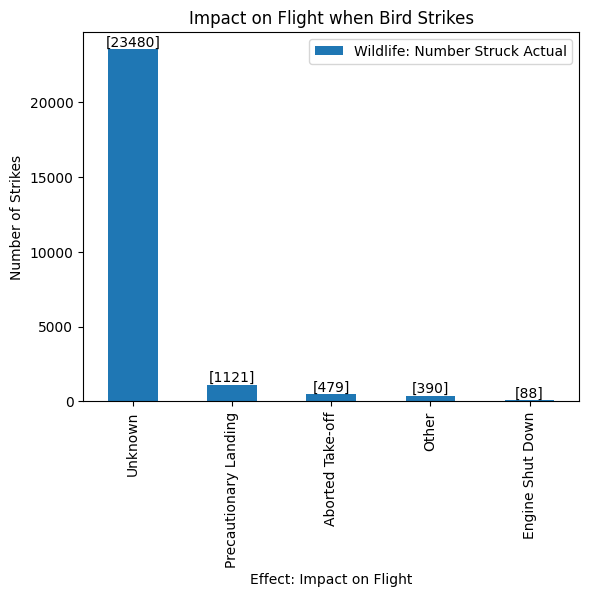

In [ ]:
Impact_to_Flight.plot(kind="bar")
#plt.figure(figsize=(10,6))
plt.ylabel("Number of Strikes")
plt.xlabel("Effect: Impact on Flight")
plt.title("Impact on Flight when Bird Strikes")
for x,y in enumerate(Impact_to_Flight.values):
  plt.text(x,y,str(y),ha="center",va="bottom")
plt.show()

### 2.Effect of Strike at Different Altitude

In [ ]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year'],
      dtype='object')

In [ ]:
df_7=df[['Altitude bin',"Wildlife: Number Struck Actual","Effect: Impact to flight"]]

In [ ]:
when_alt_less_1000=df_7[df_7["Altitude bin"]=="< 1000 ft"][['Wildlife: Number Struck Actual','Effect: Impact to flight']]
when_alt_greater_1000=df_7[df_7["Altitude bin"]=="> 1000 ft"][['Wildlife: Number Struck Actual','Effect: Impact to flight']]
when_alt_less_1000

,Wildlife: Number Struck Actual,Effect: Impact to flight
1,424,Unknown
2,261,Unknown
3,806,Precautionary Landing
4,942,Unknown
5,537,Unknown
...,...,...
25552,1,Unknown
25554,1,Unknown
25555,1,Unknown
25556,1,Unknown


In [ ]:
when_alt_greater_1000

,Wildlife: Number Struck Actual,Effect: Impact to flight
0,859,Engine Shut Down
11,9,Unknown
13,2,Unknown
20,7,Unknown
21,7,Precautionary Landing
...,...,...
25512,1,Unknown
25522,1,Unknown
25530,1,Unknown
25547,1,Unknown


In [ ]:
Impact_when_alt_less=when_alt_less_1000.groupby("Effect: Impact to flight").count().sort_values(by='Wildlife: Number Struck Actual',ascending=False)
Impact_when_alt_greater=when_alt_greater_1000.groupby("Effect: Impact to flight").count().sort_values(by='Wildlife: Number Struck Actual',ascending=False)

In [ ]:
Impact_when_alt_less,Impact_when_alt_greater

(                          Wildlife: Number Struck Actual
 Effect: Impact to flight                                
 Unknown                                            18944
 Precautionary Landing                                878
 Aborted Take-off                                     479
 Other                                                310
 Engine Shut Down                                      74,
                           Wildlife: Number Struck Actual
 Effect: Impact to flight                                
 Unknown                                             4536
 Precautionary Landing                                243
 Other                                                 80
 Engine Shut Down                                      14)

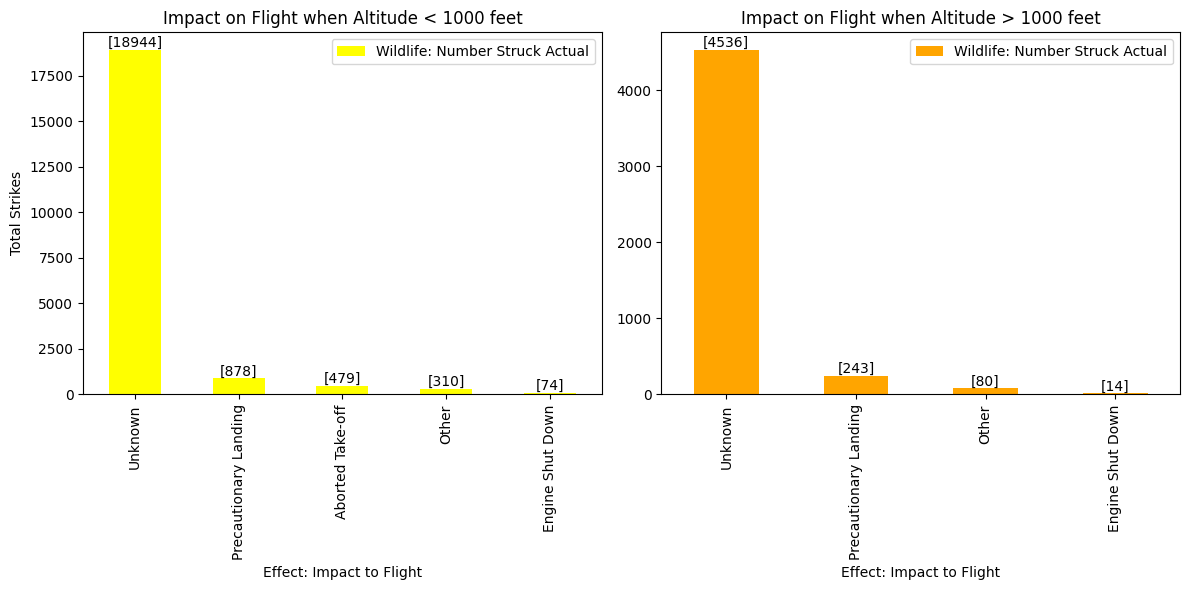

In [ ]:
#Altitude-Strike Effect Relationship:

plt.figure(figsize=(12,6))

#Impact when altitude is less than 1000 feet:
plt.subplot(1, 2, 1)
Impact_when_alt_less.plot(kind="bar", ax=plt.gca(),color="yellow")
plt.xlabel("Effect: Impact to Flight")
plt.ylabel("Total Strikes")
plt.title("Impact on Flight when Altitude < 1000 feet")
for x,y in enumerate(Impact_when_alt_less.values):
  plt.text(x,y,str(y),ha="center",va="bottom")

#Impact when altitude is greater than 1000 feet:
plt.subplot(1, 2, 2)
Impact_when_alt_greater.plot(kind="bar", ax=plt.gca(),color="orange")
plt.xlabel("Effect: Impact to Flight")
plt.ylabel("") #No need for y-axis label since it's the same as the first plot
plt.title("Impact on Flight when Altitude > 1000 feet")
for x,y in enumerate(Impact_when_alt_greater.values):
  plt.text(x,y,str(y),ha="center",va="bottom")


plt.tight_layout()
plt.show()

# 8.Were Pilots Informed? & Prior Warning and Effect of Strike Relation


### 1.Were Pilots Informed?

In [ ]:
Pilot_info=df['Pilot warned of birds or wildlife?'].value_counts(normalize=True)*100
Pilot_info

Pilot warned of birds or wildlife?
N    57.203224
Y    42.796776
Name: proportion, dtype: float64

Text(0, 0.5, 'Pilot Informed?')

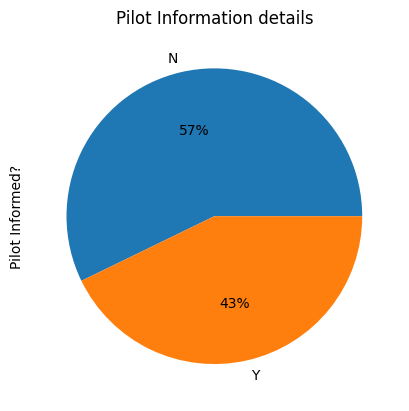

In [ ]:
Pilot_info.plot(kind="pie",autopct="%1.0f%%")
plt.title("Pilot Information details")
plt.ylabel("Pilot Informed?")

### 2.Prior Warning and Effect of Strike Relation

In [ ]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year'],
      dtype='object')

In [ ]:
Pilots_Infromed=df[df['Pilot warned of birds or wildlife?']=="Y"][['Wildlife: Number Struck Actual','Effect: Impact to flight']]
Pilots_Not_Infromed=df[df['Pilot warned of birds or wildlife?']=="N"][['Wildlife: Number Struck Actual','Effect: Impact to flight']]

In [ ]:
Pilots_infromed_Effect=Pilots_Infromed_df.groupby("Effect: Impact to flight").count().sort_values(by="Wildlife: Number Struck Actual",ascending=False)
Pilots_Not_Informed_Effect=Pilots_Not_Infromed_df.groupby("Effect: Impact to flight").count().sort_values(by="Wildlife: Number Struck Actual",ascending=False)

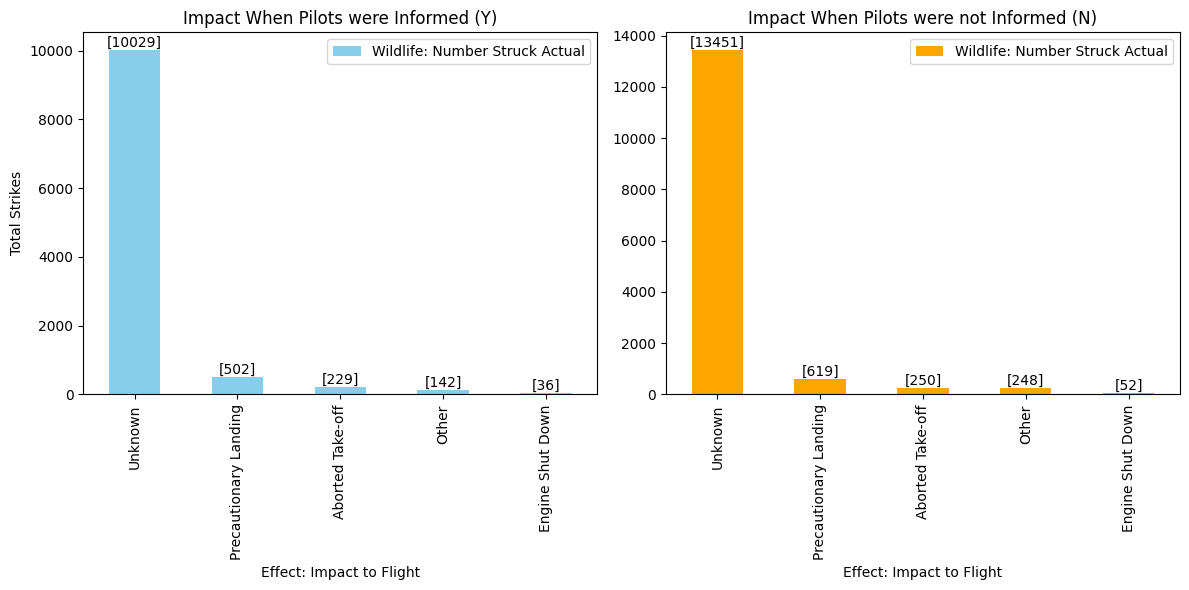

In [ ]:
#Prior Warning and Effect of Strike Relationship

plt.figure(figsize=(12,6))

#Impact when Pilots were informed:
plt.subplot(1, 2, 1)
Pilots_infromed_Effect.plot(kind="bar", ax=plt.gca(),color="skyblue")
plt.xlabel("Effect: Impact to Flight")
plt.ylabel("Total Strikes")
plt.title("Impact When Pilots were Informed (Y)")
for x,y in enumerate(Pilots_infromed_Effect.values):
  plt.text(x,y,str(y),ha="center",va="bottom")

#Impact when altitude is greater than 1000 feet:
plt.subplot(1, 2, 2)
Pilots_Not_Informed_Effect.plot(kind="bar", ax=plt.gca(),color="orange")
plt.xlabel("Effect: Impact to Flight")
plt.ylabel("") #No need for y-axis label since it's the same as the first plot
plt.title("Impact When Pilots were not Informed (N)")
for x,y in enumerate(Pilots_Not_Informed_Effect.values):
  plt.text(x,y,str(y),ha="center",va="bottom")

plt.tight_layout()
plt.show()

Done With All this...